   no2_concentration  cars_per_hour  temperature_at_2m  wind_speed  \
0            3.71844        7.69120                9.2         4.8   
1            3.10009        7.69894                6.4         3.5   
2            3.31419        4.81218               -3.7         0.9   
3            4.38826        6.95177               -7.2         1.7   
4            4.34640        7.51806               -1.3         2.6   

   temperature_diff_2m_25m  wind_direction  hour_of_day  day  
0                     -0.1            74.4           20  600  
1                     -0.3            56.0           14  196  
2                     -0.1           281.3            4  513  
3                      1.2            74.0           23  143  
4                     -0.1            65.0           11  115  
Mean squared error: 0.3471991054506812
R-Squared: 0.3820393294319586


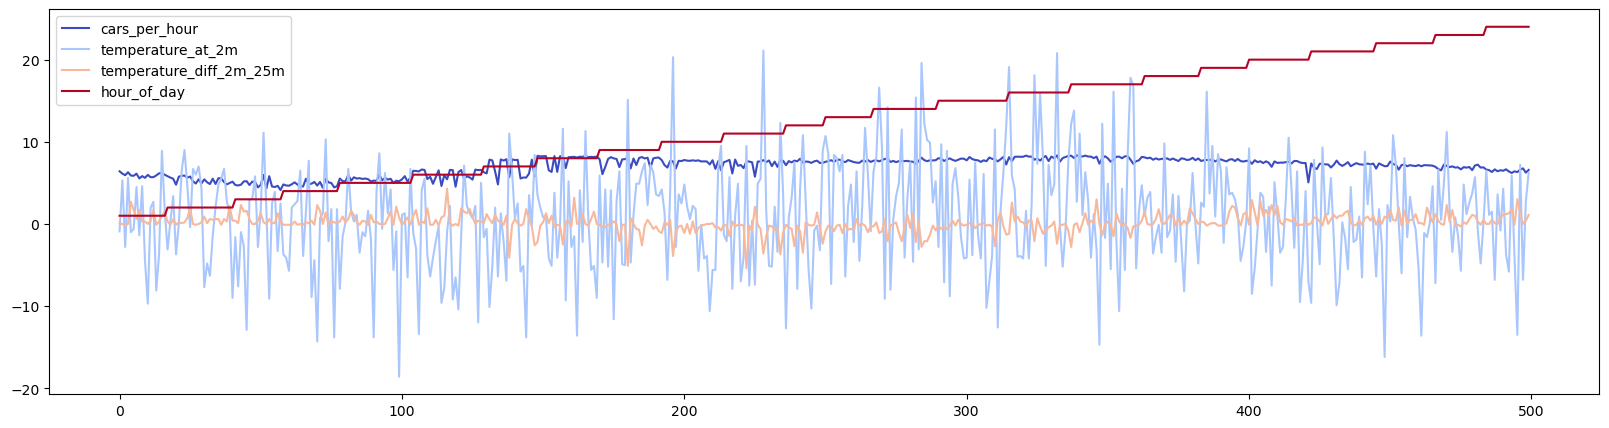

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge  # Import Ridge regression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\mohsi\\downloads\\no2.csv")
print(df.head())

X = df[['cars_per_hour', 'temperature_at_2m', 'temperature_diff_2m_25m', 'hour_of_day']]
Y = df['no2_concentration']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Use Ridge regression instead of LinearRegression
alpha = 1.0  # You can adjust the regularization strength
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-Squared:", r2)

# Plotting
df = pd.DataFrame(X, columns=['cars_per_hour', 'temperature_at_2m', 'temperature_diff_2m_25m', 'hour_of_day', 'day'])
df = df.sort_values(['day', 'hour_of_day']).drop('day', axis=1)
cm = plt.get_cmap('coolwarm')
df.plot(use_index=False, figsize=(20, 5), cmap=cm)
plt.show() 
